In [11]:
from qutip import *
import numpy as np
import matplotlib.pyplot as plt

# A simple Raman transition

Consider three levels with the following Hamiltonian
$$H = -\Delta |e\rangle \langle e| - \frac{1}{2}\left( \Omega_1 | e\rangle\langle g_1 | + \Omega_2| e\rangle\langle g_2 | + h.c. \right)$$
How does that evolve, especially: what does the excited state population $\langle e| e\rangle$ do for large $\Delta$? Can it be eliminated?

In [95]:
c = 2.997E8
Delta = 2*np.pi*1000
Omega1 = 2*np.pi*10
Omega2 = 2*np.pi*10

(Omega1*Omega2/Delta)/(2*np.pi)

0.10000000000000002

In [96]:
coupling = Omega1/2*Qobj([[0,0,1],[0,0,0],[1,0,0]]) + Omega2/2*Qobj([[0,0,0],[0,0,1],[0,1,0]])
energyOffset = Delta * basis(3, 2).proj()

H = coupling + energyOffset

In [97]:
expvals = []
for i in range(3):
    expvals.append( basis(3, i).proj() )

In [99]:
tmax = 100
nsteps = 10000
tlist = np.linspace(0, tmax, nsteps)
psi0 = basis(3, 1)

sol = sesolve(H, psi0, tlist, e_ops = expvals)

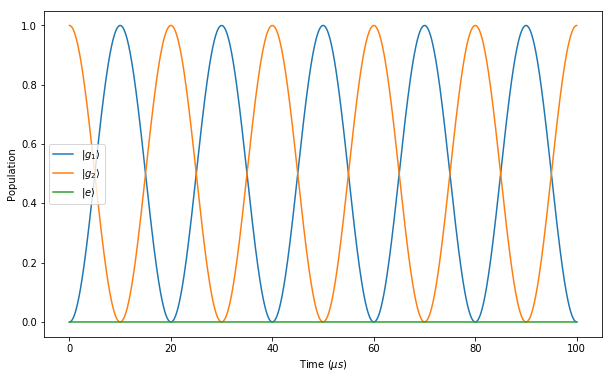

In [102]:
labels = [r'$|g_1 \rangle$', r'$|g_2 \rangle$', r'$| e \rangle$']
fig, ax = plt.subplots(figsize=(10, 6))
for i in range(3):
    ax.plot(tlist, sol.expect[i], label = labels[i])
    
ax.set_xlabel('Time ($\mu s$)')
ax.set_ylabel('Population')
ax.legend()
plt.show()